In [1]:
import os
import random
import fnmatch
import datetime
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" %x})

In [2]:
import pandas as pd 
pd.set_option('display.width',300)
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_colwidth',200)

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

#print(f 'tf.__version__: {tf.__version__}' )
#print(f '.keras.__version: {tensorflow.keras.__version__}' )

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [5]:
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [6]:
"""data_dir = '../../../../media/khs/KHS/UNIV/sample4'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles=[]
pattern="*.png"
i=0
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        #print(data_dir+'/'+filename)
        img = cv2.imread(data_dir+'/'+filename,cv2.IMREAD_COLOR)
        img_convert = cv2.flip(img,1)
        angle=int(filename[-7:-4])
        if angle == 45:
            cv2.imwrite(data_dir+'/new/A'+str(str(i).zfill(5))+'_135.png',img_convert)
            i = i + 1
        if angle == 90:
            cv2.imwrite(data_dir+'/new/A'+str(str(i).zfill(5))+'_090.png',img_convert)
            i = i + 1
        if angle == 135:
            cv2.imwrite(data_dir+'/new/A'+str(str(i).zfill(5))+'_045.png',img_convert)
            i = i + 1"""

'data_dir = \'../../../../media/khs/KHS/UNIV/sample4\'\nfile_list = os.listdir(data_dir)\nimage_paths = []\nsteering_angles=[]\npattern="*.png"\ni=0\nfor filename in file_list:\n    if fnmatch.fnmatch(filename, pattern):\n        #print(data_dir+\'/\'+filename)\n        img = cv2.imread(data_dir+\'/\'+filename,cv2.IMREAD_COLOR)\n        img_convert = cv2.flip(img,1)\n        angle=int(filename[-7:-4])\n        if angle == 45:\n            cv2.imwrite(data_dir+\'/new/A\'+str(str(i).zfill(5))+\'_135.png\',img_convert)\n            i = i + 1\n        if angle == 90:\n            cv2.imwrite(data_dir+\'/new/A\'+str(str(i).zfill(5))+\'_090.png\',img_convert)\n            i = i + 1\n        if angle == 135:\n            cv2.imwrite(data_dir+\'/new/A\'+str(str(i).zfill(5))+\'_045.png\',img_convert)\n            i = i + 1'

In [7]:
data_dir = '../../../../media/khs/KHS/UNIV/sample6'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles=[]
pattern="*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        image_paths.append(os.path.join(data_dir,filename))
        angle=int(filename[-7:-4])
        if angle == 45:
            angle = 0
        if angle == 90:
            angle = 1
        if angle == 135:
            angle = 2
        steering_angles.append(angle)

In [8]:
image_index=20
plt.show(Image.open(image_paths[image_index]))
print("image_path: %s" %image_paths[image_index])
print("steering_angle: %d" %steering_angles[image_index])
df=pd.DataFrame()
df['ImagePath']=image_paths
df['Angle']=steering_angles

image_path: ../../../../media/khs/KHS/UNIV/sample6/A01146_090.png
steering_angle: 1


(array([943.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1392.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        580.0000]),
 array([0.0000, 0.0800, 0.1600, 0.2400, 0.3200, 0.4000, 0.4800, 0.5600,
        0.6400, 0.7200, 0.8000, 0.8800, 0.9600, 1.0400, 1.1200, 1.2000,
        1.2800, 1.3600, 1.4400, 1.5200, 1.6000, 1.6800, 1.7600, 1.8400,
        1.9200, 2.0000]),
 <BarContainer object of 25 artists>)

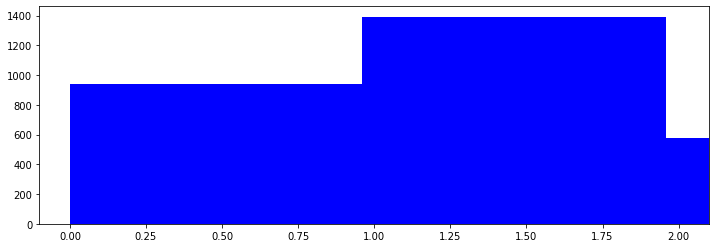

In [9]:
num_of_bins=25
hist,bins=np.histogram(df['Angle'],num_of_bins)
fig,axes=plt.subplots(1,1,figsize=(12,4))
axes.hist(df['Angle'],bins=num_of_bins, width=1, color='blue')

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths,steering_angles, test_size=0.2)
print("Training data: %d\nValidation data: %d" %(len(X_train),len(X_valid)))

Training data: 2332
Validation data: 583


Text(0.5, 1.0, 'Validation Data')

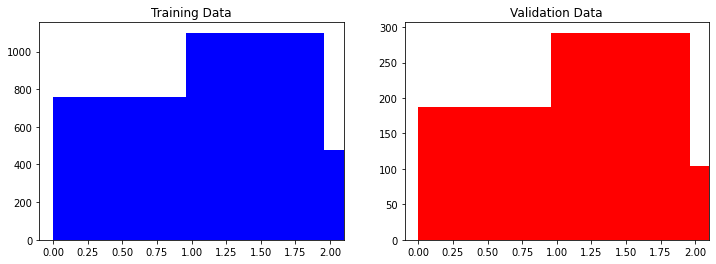

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title('Validation Data')

In [12]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    return image

def img_preprocess(image):
    image=image/255
    image = cv2.resize(image, (100,33))
    return image

Text(0.5, 1.0, 'processed')

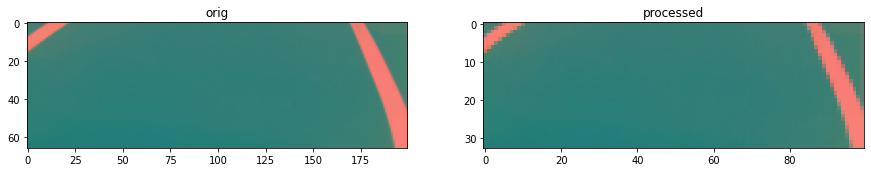

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
image_orig=my_imread(image_paths[image_index])
image_processed=img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [14]:
def Nvidia_model():
    model = Sequential(name='Nvidia_Model')
    model.add(Conv2D(24,(5,5), strides=(2,2),input_shape=(66,200,3), activation='elu'))
    model.add(Conv2D(36,(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(3, activation='softmax'))
    
    optimizer=Adam(lr=1e-5)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
#model =Nvidia_model()
#print(model.summary())

In [36]:
def nvidia_model():
    model = Sequential(name='Nvidia_Model')
    model.add(Conv2D(32,(5,5), strides=(2,2),input_shape=(33,100,3), activation='elu'))
    model.add(Conv2D(32,(5,5), strides=(2,2), activation='elu'))
    #model.add(Conv2D(32,(5,5), activation='elu'))
    model.add(Dropout(0.3))
    model.add(Conv2D(16,(5,5), activation='elu'))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='elu'))
    model.add(Dense(16, activation='elu'))
    model.add(Dense(8, activation='elu'))
    model.add(Dense(3, activation='softmax'))
    
    optimizer=Adam(lr=1e-5)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
model =nvidia_model()
print(model.summary())

Model: "Nvidia_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 15, 48, 32)        2432      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 6, 22, 32)         25632     
_________________________________________________________________
dropout_35 (Dropout)         (None, 6, 22, 32)         0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 2, 18, 16)         12816     
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 576)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 16)               

In [37]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for i in range(batch_size):
            random_index=random.randint(0,len(image_paths)-1)
            image_path=image_paths[random_index]
            image=my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
            
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
        yield(np.asarray(batch_images), np.asarray(batch_steering_angles))

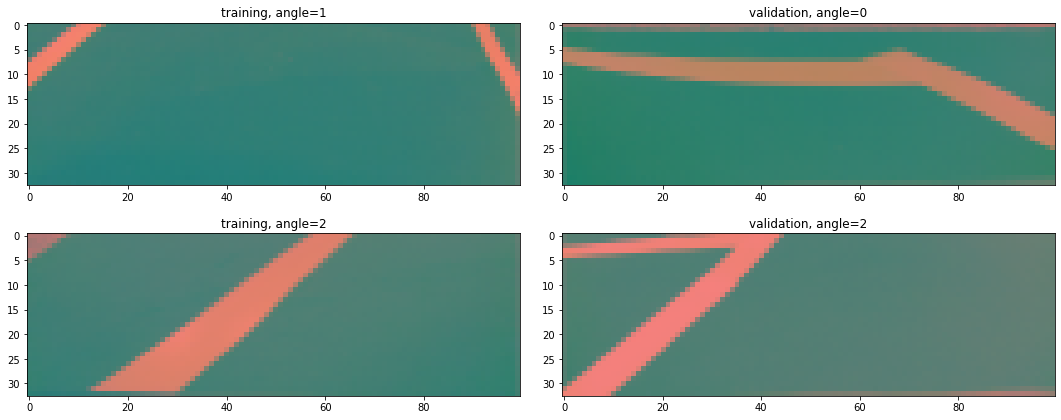

In [38]:
ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15,6))
fig.tight_layout()

for i in range(2):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" %y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s" %y_valid_batch[i])

In [39]:
model_output_dir = "."
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir,'lane_navigation_check.h5'), verbose=1, save_best_only=True)

In [40]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 235742902208174561,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2350773495259583775
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8980428059621060800
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10197776512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4237652172724149176
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [41]:
from tensorflow.keras.callbacks import LearningRateScheduler
def step_decay(epoch):
    start = 1e-5
    drop = 0.1
    epochs_drop = 10.0
    lr = start * (drop ** np.floor((epoch)/epochs_drop))
    return lr
lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

In [42]:
with tf.device("/device:GPU:0"):
  history = model.fit_generator(image_data_generator(X_train, y_train, batch_size=100), steps_per_epoch=300, epochs=30, validation_data = image_data_generator(X_valid, y_valid, batch_size=100),validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
299/300 [============================>.] - ETA: 0s - loss: 1.0455 - accuracy: 0.4608
Epoch 00001: val_loss improved from inf to 0.99483, saving model to ./lane_navigation_check.h5
300/300 [==============================] - 17s 58ms/step - loss: 1.0455 - accuracy: 0.4605 - val_loss: 0.9948 - val_accuracy: 0.5311
Epoch 2/30
299/300 [============================>.] - ETA: 0s - loss: 0.9416 - accuracy: 0.6019
Epoch 00002: val_loss improved from 0.99483 to 0.82784, saving model to ./lane_navigation_check.h5
300/300 [==============================] - 17s 57ms/step - loss: 0.9410 - accuracy: 0.6023 - val_loss: 0.8278 - val_accuracy: 0.6727
Epoch 3/30
299/300 [============================>.] - ETA: 0s - loss: 0.7710 - accuracy: 0.6866
Epoch 00003: val_loss improved from 0.82784 to 0.70377, saving model to ./lane_navigation_check.h5
300/300 [==============================] - 17s 57ms/step - loss: 0.7712 - acc

In [43]:
model.save(os.path.join(model_output_dir,'lane_navigation_final.h5'))

In [44]:
history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'wb') as f:
  pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

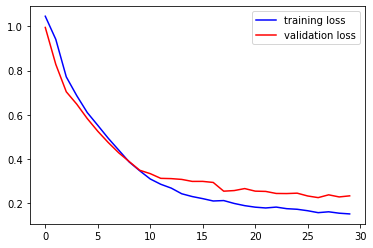

In [45]:
#history.history

history_path=os.path.join(model_output_dir,'history.pickle')
with open(history_path, 'rb') as f:
  history = pickle.load(f)

history
plt.plot(history['loss'], color='blue')
plt.plot(history['val_loss'], color='red')
plt.legend(["training loss","validation loss"])

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize_prediction(Y_true, Y_pred):
  mse = mean_squared_error(Y_true, Y_pred)
  r_squared = r2_score(Y_true, Y_pred)

  print(f'mse={mse:.2}')
  print(f'r_squared={r_squared:.2%}')
  print()

In [53]:
def predict_and_summarize(X,Y):
  model=load_model(f'{model_output_dir}/lane_navigation_final.h5')
  #model=load_model(f'{model_output_dir}/lane_navigation_check.h5')
  Y_pred = model.predict(X)
  Y_pred_max = np.argmax(Y_pred, axis = -1)
  summarize_prediction(Y, Y_pred_max)
  return Y_pred

In [54]:
n_tests = 100
X_test, y_test = next(image_data_generator(X_valid, y_valid, 100))
X_test.shape
#



(100, 33, 100, 3)

In [55]:
y_test.shape

(100,)

mse=0.04
r_squared=89.48%



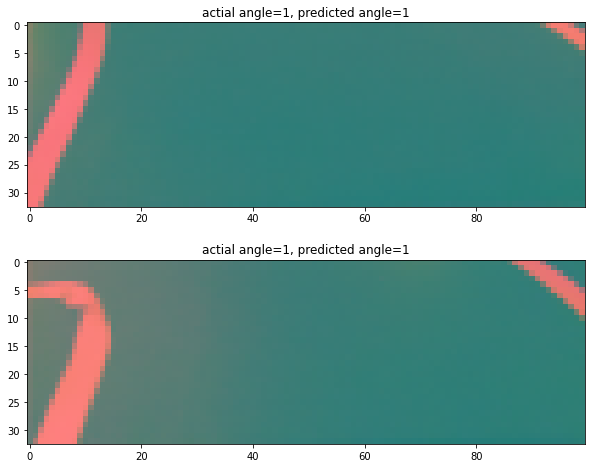

In [56]:
y_pred = predict_and_summarize(X_test,y_test)
n_tests_show=2
fig,axes=plt.subplots(n_tests_show,1,figsize=(10,4*n_tests_show))
for i in range(n_tests_show):
    axes[i].imshow(X_test[i])
    #axes[i].set_title(f"actial angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff={int(y_pred[i])-y_test[i]}")
    axes[i].set_title(f"actial angle={y_test[i]}, predicted angle={int(np.argmax(y_pred[i], axis = -1))}")

In [57]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9600


[0.1692267805337906, 0.9599999785423279]

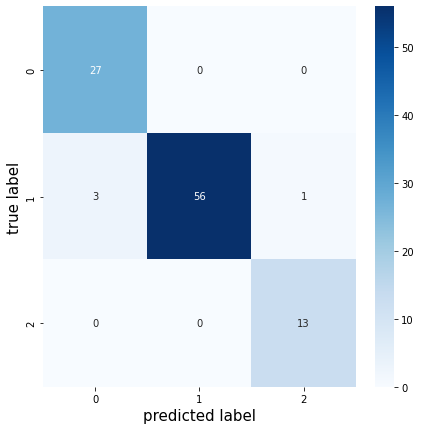

In [58]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(y_test, np.argmax(y_pred, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()